In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('AKBNK.csv', index_col=0, parse_dates=True)

In [3]:
from statsmodels.tsa.holtwinters import Holt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


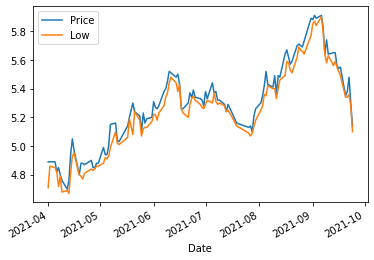

In [4]:
garan_close = df.drop(columns=['Open', 'High','Vol.','Change %'])
garan_close.plot()

In [5]:
garan_close.drop_duplicates()

,Price,Low
Date,,
2021-09-24,5.14,5.10
2021-09-23,5.30,5.28
2021-09-22,5.48,5.36
2021-09-21,5.38,5.34
2021-09-20,5.35,5.34
...,...,...
2021-04-07,4.85,4.72
2021-04-06,4.82,4.82
2021-04-05,4.89,4.85


In [6]:
garan_close = garan_close.sort_index()

In [7]:
garan_close =garan_close.reindex(pd.date_range(garan_close.index.min().to_datetime64(),garan_close.index.max().to_datetime64()))

In [8]:
garan_close.index.freq = 'D'

In [9]:
garan_close=garan_close.fillna(method='ffill')

In [10]:
garan_close

,Price,Low
2021-04-01,4.89,4.71
2021-04-02,4.89,4.86
2021-04-03,4.89,4.86
2021-04-04,4.89,4.86
2021-04-05,4.89,4.85
...,...,...
2021-09-20,5.35,5.34
2021-09-21,5.38,5.34
2021-09-22,5.48,5.36
2021-09-23,5.30,5.28


In [11]:
holt = Holt(garan_close['Price'])

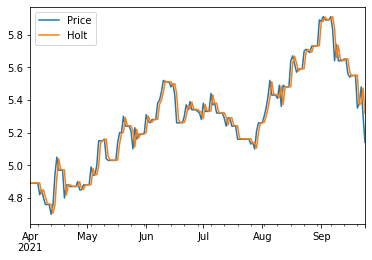

In [12]:
res_h = holt.fit()
garan_close['Holt'] = res_h.fittedvalues
garan_close[['Price', 'Holt']].plot()

In [13]:
N_test = 5
train = garan_close[:-N_test]
test = garan_close[-N_test:]

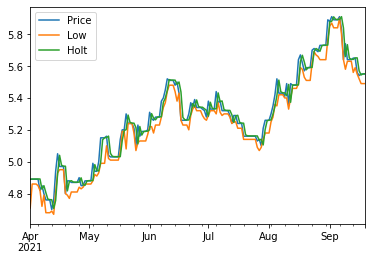

In [14]:
train.plot()

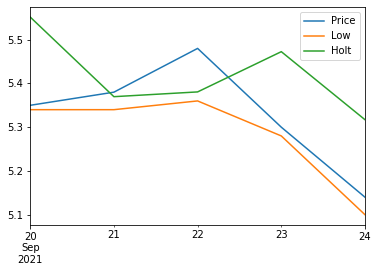

In [15]:
test.plot()

In [16]:
# boolean series to index df rows
train_idx = garan_close.index <= train.index[-1]
test_idx = garan_close.index > train.index[-1]

In [17]:
holt = Holt(train['Price'])
res_h = holt.fit()
garan_close.loc[train_idx, 'Holt_Forecast'] = res_h.fittedvalues

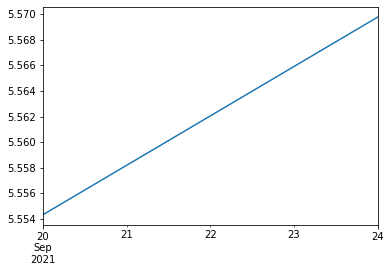

In [18]:
res_h.forecast(N_test).plot()

In [19]:
garan_close.loc[test_idx, 'Holt_Forecast'] = res_h.forecast(N_test)

In [20]:
alpha = 0.9
garan_close['EWMA'] = garan_close['Price'].ewm(alpha=alpha, adjust=False).mean()

In [21]:
garan_close['SMA-50'] = garan_close['Price'].rolling(50).mean()

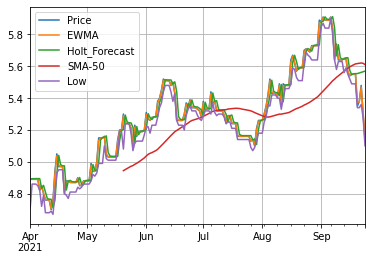

In [22]:
garan_close[['Price','EWMA','Holt_Forecast','SMA-50','Low']].plot().grid();

In [23]:
garan_close[['Price','Holt_Forecast','SMA-50']].tail(20)

,Price,Holt_Forecast,SMA-50
2021-09-05,5.89,5.894524,5.4826
2021-09-06,5.91,5.894351,5.4960
2021-09-07,5.83,5.912183,5.5094
2021-09-08,5.64,5.842700,5.5190
2021-09-09,5.74,5.665656,5.5306
2021-09-10,5.64,5.735873,5.5402
2021-09-11,5.64,5.654172,5.5498
2021-09-12,5.64,5.645389,5.5594
2021-09-13,5.65,5.644444,5.5692
2021-09-14,5.65,5.653268,5.5796
